<a href="https://colab.research.google.com/github/christopher-ell/Deep_Learning_Begin/blob/master/3_Basic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: https://www.tensorflow.org/tutorials/keras/basic_regression

In [0]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.12.0


**The Boston Housing Price Dataset**

In regression problems you try to predict the output of a continuous value, like price or probability.
This is contrasted with a clssification problem, where we aim to predict a discrete label

This will build a model of median house prices in Boston during the 70's. To do this the model will be provided with data points about the suburb such as crime and property taxes



In [0]:
## Ths is a common enough training dataset that it is accessible in tensorflow 
## below
boston_housing = keras.datasets.boston_housing

## Unpack the dataset into training and testing data and training and testing 
## labels
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# Shuffle the training set
## Create a list of randomly shuffled numbers between 0 and the length of the 
## training labels
order = np.argsort(np.random.random(train_labels.shape))
## Use the randomly shuffled numbers to shuffle the training data
train_data = train_data[order]
## Use the randonly shuffled numbers to shuffle the training labels in the same 
## way as the trainin data was shuffled
train_labels = train_labels[order]

57344/57026 [==============================] - 0s 0us/step


**Examples and Features**

In [0]:
## Check the length of the training data
print("Training set: {}".format(train_data.shape))
## Check the length of the test data
print("Testing set: {}".format(test_data.shape))

Training set: (404, 13)
Testing set: (102, 13)


In [0]:
## Take a look at the first example and see the values are on largely different 
## scales
print(train_data[0]) # Display sample features, notice the different scales 

[7.8750e-02 4.5000e+01 3.4400e+00 0.0000e+00 4.3700e-01 6.7820e+00
 4.1100e+01 3.7886e+00 5.0000e+00 3.9800e+02 1.5200e+01 3.9387e+02
 6.6800e+00]


In [0]:
## Use Pandas to view the data in a nicely formatted dataframe 
import pandas as pd

## Set the column names for the dataframe
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
               'TAX', 'PTRATIO', 'B', 'LSTAT']

## Put the data into a dataframe with the above specified column names
df = pd.DataFrame(train_data, columns=column_names)
## Show the first few observations of the dataframe nicely formatted
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


**Labels**

In [0]:
## Show labels, which are house prices in thousands of dollars
print(train_labels[0:10]) # Display first 10 entries

[32.  27.5 32.  23.1 50.  20.6 22.6 36.2 21.8 19.5]


**Normalise Features**

Since features are on such different scales it is a good idea to normalise them. This makes it easier for the model to converge and less dependent on the choice of initial parameters

In [0]:
# Test data is "not" used when calculating the mean and std
## Calculate the mean of the training data
mean = train_data.mean(axis=0)
## Calculate the standard deviation of the training data
std = train_data.mean(axis=0)
## Normalise the training data by subtracting it's mean and dividing by its 
## standard deviation
train_data = (train_data - mean) / std
## Normalise the test data by subtracting the training mean and dividing by the 
## training standard deviation
test_data = (test_data - mean) / std

## View first version of the standardised data
print(train_data[0]) # First training sample, normalized

[-0.97897258  2.91979301 -0.69021374 -1.         -0.21594089  0.08216238
 -0.40443969  0.01292131 -0.47037231 -0.01945933 -0.17731067  0.11017104
 -0.47570081]


**Create The Model**

In [0]:
## Build the model that will use a linear sequential stack of layers
def build_model():
  model = keras.Sequential([
      ## Densley packed hidden layer with 64 notes and a relu activation 
      ## function
      keras.layers.Dense(64, activation = tf.nn.relu,
                         ## Shape of the data input into the model
                        input_shape = (train_data.shape[1],)),
      ## Another dense layer with 64 nodes 
      keras.layers.Dense(64, activation = tf.nn.relu),
      keras.layers.Dense(1)
  ])
  
  optimizer = tf.train.RMSPropOptimizer(0.001)
  
  model.compile(loss = 'mse', 
               optimizer = optimizer,
               metrics = ['mae'])
  
  return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


**Train The Model**

In [0]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')
    
EPOCHS = 500

# Store training stats
history = model.fit(train_data, train_labels, epochs=EPOCHS, 
                   validation_split = 0.2, verbose = 0, 
                   callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

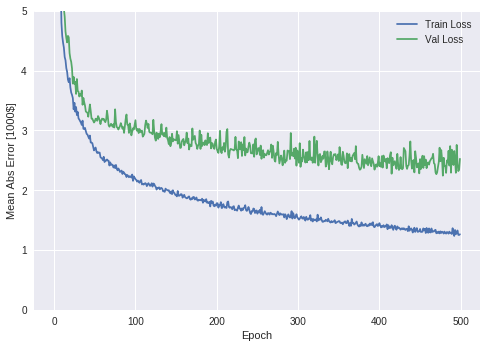

In [0]:
import matplotlib.pyplot as plt

def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']), 
          label = 'Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
          label = 'Val Loss')
  plt.legend()
  plt.ylim([0, 5])

plot_history(history)


....................................................................................................
....................................................................................................
....................................................................................................
........

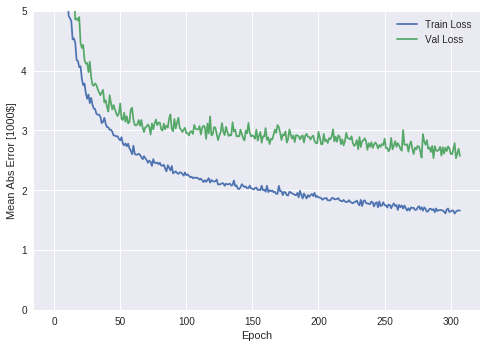

In [0]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 20)

history =  model.fit(train_data, train_labels, epochs = EPOCHS,
                    validation_split = 0.2, verbose = 0,
                    callbacks = [early_stop, PrintDot()])

plot_history(history)

In [0]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose = 0)

print("Testing set Mean Abs Error : ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error : $2829.09


**Predict**

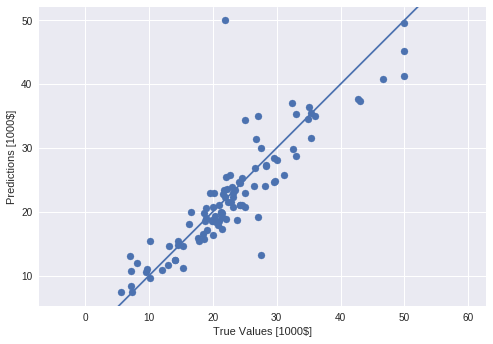

In [0]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
_ = plt.plot([-100, 100], [-100, 100])

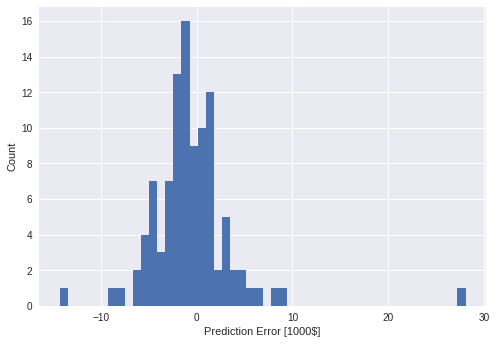

In [0]:
error = test_predictions - test_labels
plt.hist(error, bins = 50)
plt.xlabel('Prediction Error [1000$]')
_= plt.ylabel("Count")